# Deep Neural Networks, Assignment 4

In this project we will try to build a model based on Recurrent Neural Networks that will predict the Close values of a stock.

For this case, we picked the historycal data from the last 10 years for the TESLA Inc. (TSLA) stock.

The model will focus on the Last/Close price of the stock to forecast the future prices.

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas as pd
data_orig = pd.read_csv("HistoricalData_Tesla10y.csv") # we downloaded the last 10 years for this stock into a csv
data=data_orig.copy()

In [3]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/24/2023,$269.06,137005000,$255.85,$269.85,$254.12
1,07/21/2023,$260.02,161796100,$268.00,$268.00,$255.80
2,07/20/2023,$262.90,175158300,$279.56,$280.93,$261.20
3,07/19/2023,$291.26,142355400,$296.04,$299.29,$289.5201
4,07/18/2023,$293.34,112434700,$290.15,$295.26,$286.01


In [4]:
data.info

<bound method DataFrame.info of             Date Close/Last     Volume     Open     High        Low
0     07/24/2023    $269.06  137005000  $255.85  $269.85    $254.12
1     07/21/2023    $260.02  161796100  $268.00  $268.00    $255.80
2     07/20/2023    $262.90  175158300  $279.56  $280.93    $261.20
3     07/19/2023    $291.26  142355400  $296.04  $299.29  $289.5201
4     07/18/2023    $293.34  112434700  $290.15  $295.26    $286.01
...          ...        ...        ...      ...      ...        ...
2511  07/31/2013     $8.952   95073822   $8.838  $8.9983    $8.7633
2512  07/30/2013    $8.7827  196798702  $8.9867   $9.166    $8.5453
2513  07/29/2013    $8.9747  145171202  $8.6213  $9.0247      $8.55
2514  07/26/2013     $8.626  144408333  $8.5427   $8.712    $8.4407
2515  07/25/2013    $8.2713   79258070  $8.0267  $8.3167    $8.0127

[2516 rows x 6 columns]>

# Preprocessing and cleaning our Dataset

In [5]:
data['Close/Last']=data['Close/Last'].str.replace('$', '') # Remove Dollar sign from our columns
data['Open']=data['Open'].str.replace('$', '')
data['High']=data['High'].str.replace('$', '')
data['Low']=data['Low'].str.replace('$', '')
data

C:\Users\doitsinis\AppData\Local\Temp\ipykernel_26168\733910553.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Close/Last']=data['Close/Last'].str.replace('$', '') # Remove Dollar sign from our columns
C:\Users\doitsinis\AppData\Local\Temp\ipykernel_26168\733910553.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Open']=data['Open'].str.replace('$', '')
C:\Users\doitsinis\AppData\Local\Temp\ipykernel_26168\733910553.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['High']=data['High'].str.repl

,Date,Close/Last,Volume,Open,High,Low
0,07/24/2023,269.06,137005000,255.85,269.85,254.12
1,07/21/2023,260.02,161796100,268.00,268.00,255.80
2,07/20/2023,262.90,175158300,279.56,280.93,261.20
3,07/19/2023,291.26,142355400,296.04,299.29,289.5201
4,07/18/2023,293.34,112434700,290.15,295.26,286.01
...,...,...,...,...,...,...
2511,07/31/2013,8.952,95073822,8.838,8.9983,8.7633
2512,07/30/2013,8.7827,196798702,8.9867,9.166,8.5453
2513,07/29/2013,8.9747,145171202,8.6213,9.0247,8.55
2514,07/26/2013,8.626,144408333,8.5427,8.712,8.4407


In [6]:
data['Close/Last']=data['Close/Last'].astype(float)
data['Open']=data['Open'].astype(float)
data['High']=data['High'].astype(float)
data['Low']=data['Low'].astype(float)
data.dtypes

Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [7]:
from datetime import datetime

In [8]:
data['Date']= pd.to_datetime(data['Date']) # convert to date format
data['Date']

0      2023-07-24
1      2023-07-21
2      2023-07-20
3      2023-07-19
4      2023-07-18
          ...    
2511   2013-07-31
2512   2013-07-30
2513   2013-07-29
2514   2013-07-26
2515   2013-07-25
Name: Date, Length: 2516, dtype: datetime64[ns]

In [9]:
data.set_index(['Date'],inplace=True) # Setting the date to be the index

In [10]:
data.sort_values(by='Date', inplace = True) # sorting from older to newer
print(data)

            Close/Last     Volume      Open      High       Low
Date                                                           
2013-07-25      8.2713   79258070    8.0267    8.3167    8.0127
2013-07-26      8.6260  144408333    8.5427    8.7120    8.4407
2013-07-29      8.9747  145171202    8.6213    9.0247    8.5500
2013-07-30      8.7827  196798702    8.9867    9.1660    8.5453
2013-07-31      8.9520   95073822    8.8380    8.9983    8.7633
...                ...        ...       ...       ...       ...
2023-07-18    293.3400  112434700  290.1500  295.2600  286.0100
2023-07-19    291.2600  142355400  296.0400  299.2900  289.5201
2023-07-20    262.9000  175158300  279.5600  280.9300  261.2000
2023-07-21    260.0200  161796100  268.0000  268.0000  255.8000
2023-07-24    269.0600  137005000  255.8500  269.8500  254.1200

[2516 rows x 5 columns]


In [11]:
data.head() # Our dataset is ready for spliting 

,Close/Last,Volume,Open,High,Low
Date,,,,,
2013-07-25,8.2713,79258070,8.0267,8.3167,8.0127
2013-07-26,8.6260,144408333,8.5427,8.7120,8.4407
2013-07-29,8.9747,145171202,8.6213,9.0247,8.5500
2013-07-30,8.7827,196798702,8.9867,9.1660,8.5453
2013-07-31,8.9520,95073822,8.8380,8.9983,8.7633


Text(0, 0.5, 'Prices ($)')

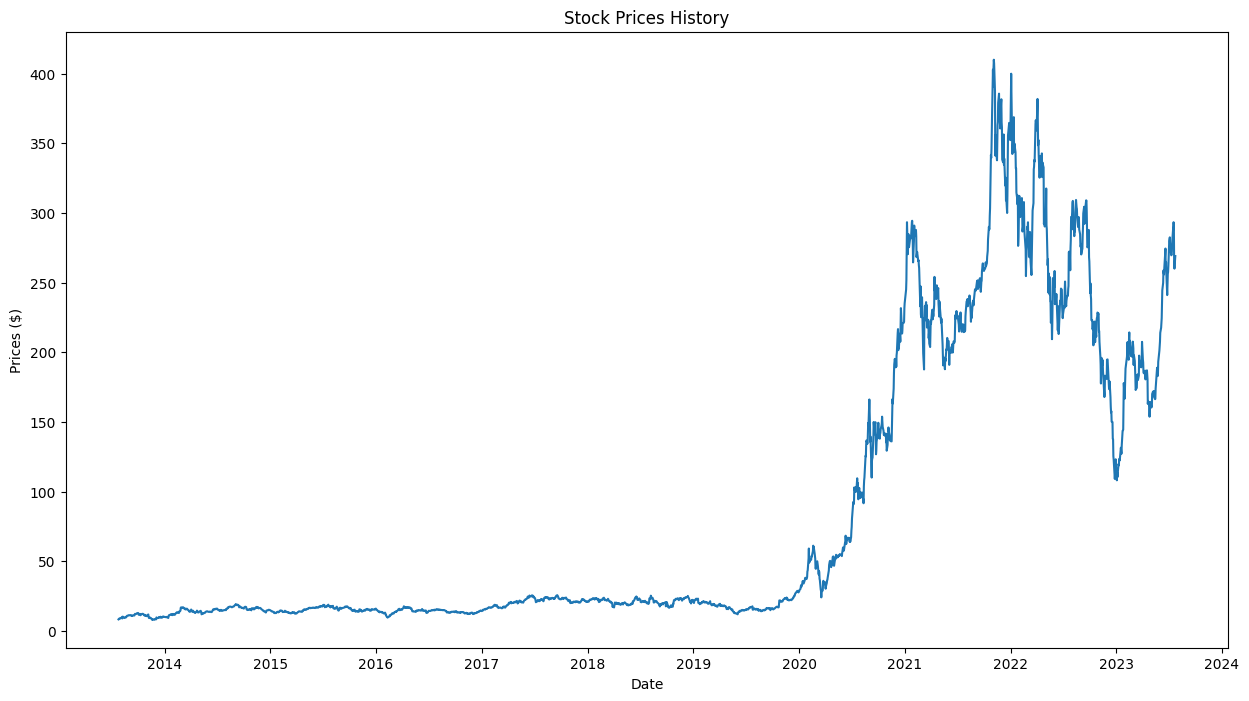

In [12]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(data['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

# Splitting And Scaling our Data

In [13]:
close_prices = data['Close/Last']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8) # 80% Train, 20% Test

In [14]:
print(f"Close Process: {close_prices}")

Close Process: Date
2013-07-25      8.2713
2013-07-26      8.6260
2013-07-29      8.9747
2013-07-30      8.7827
2013-07-31      8.9520
                ...   
2023-07-18    293.3400
2023-07-19    291.2600
2023-07-20    262.9000
2023-07-21    260.0200
2023-07-24    269.0600
Name: Close/Last, Length: 2516, dtype: float64


In [15]:
training_data_len

2013

In [16]:
scaler = MinMaxScaler(feature_range=(0,1)) # bring all values in range (0,1)
scaled_data = scaler.fit_transform(values.reshape(-1,1))

In [17]:
scaled_data

array([[5.92133040e-04],
       [1.47461031e-03],
       [2.34215985e-03],
       ...,
       [6.34096613e-01],
       [6.26931305e-01],
       [6.49422409e-01]])

# Creating Train and Test data

In [18]:
train_data = scaled_data[0: training_data_len, :] # 80%
train_data.shape

(2013, 1)

In [19]:
time_steps=100

In [20]:
x_train = []
y_train = []

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [21]:
x_train.shape

(1913, 100, 1)

In [22]:
y_train.shape

(1913,)

In [23]:
test_data = scaled_data[training_data_len-time_steps: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(time_steps, len(test_data)):
  x_test.append(test_data[i-time_steps:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
x_test.shape

(503, 100, 1)

# The RNN LSTM model

In [25]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [26]:
print(f"X train:", {x_train.shape}, ", Y Train:", {y_train.shape}, ", X test:", {x_test.shape}, " , Y test:", {y_test.shape})

X train: {(1913, 100, 1)} , Y Train: {(1913,)} , X test: {(503, 100, 1)}  , Y test: {(503,)}


In [27]:
model.compile(optimizer='adam', loss='mean_squared_error') # accuracy makes no sence in this case, because this is a regression problem. 
model.fit(x_train, y_train, epochs=20, verbose=1) 

Epoch 1/20
60/60 [==============================] - 17s 235ms/step - loss: 0.0016
Epoch 2/20
60/60 [==============================] - 9s 140ms/step - loss: 2.7264e-04
Epoch 3/20
60/60 [==============================] - 6s 93ms/step - loss: 3.1526e-04
Epoch 4/20
60/60 [==============================] - 5s 89ms/step - loss: 2.1396e-04
Epoch 5/20
60/60 [==============================] - 6s 100ms/step - loss: 1.9991e-04
Epoch 6/20
60/60 [==============================] - 6s 103ms/step - loss: 1.6552e-04
Epoch 7/20
60/60 [==============================] - 6s 94ms/step - loss: 1.5644e-04
Epoch 8/20
60/60 [==============================] - 6s 96ms/step - loss: 1.6820e-04
Epoch 9/20
60/60 [==============================] - 6s 104ms/step - loss: 1.9187e-04
Epoch 10/20
60/60 [==============================] - 6s 102ms/step - loss: 1.6041e-04
Epoch 11/20
60/60 [==============================] - 6s 101ms/step - loss: 1.9797e-04
Epoch 12/20
60/60 [==============================] - 6s 100ms/step - l

In [28]:
predictions = model.predict(x_test)

16/16 [==============================] - 1s 33ms/step


In [29]:
predictions = scaler.inverse_transform(predictions)# our predictions are scaled into 0,1 so we need reverce scaling to get real prices 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.008805506171952963

In [30]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("MAPE:", mape, "%")

MAPE: 31.778509869581296 %


In general, here’s a loose guide to interpreting MAPE values:

MAPE < 10%: Highly accurate predictions 

10% ≤ MAPE < 20%: Good predictions, but with noticeable error

20% ≤ MAPE < 50%: Fair predictions, with significant error

MAPE ≥ 50%: Poor predictions, with very high deviation from actual values

In [31]:
predictions.shape

(503, 1)

In [32]:
data_new = data.filter(['Close/Last']) # we will show te Close/Last price value of the stock
#data

In [33]:
train_new = data_new[:training_data_len]
#train_new

In [34]:
validation_new = data_new[training_data_len:]
#validation_new

C:\Users\doitsinis\AppData\Local\Temp\ipykernel_26168\353184765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_new['Predictions'] = predictions


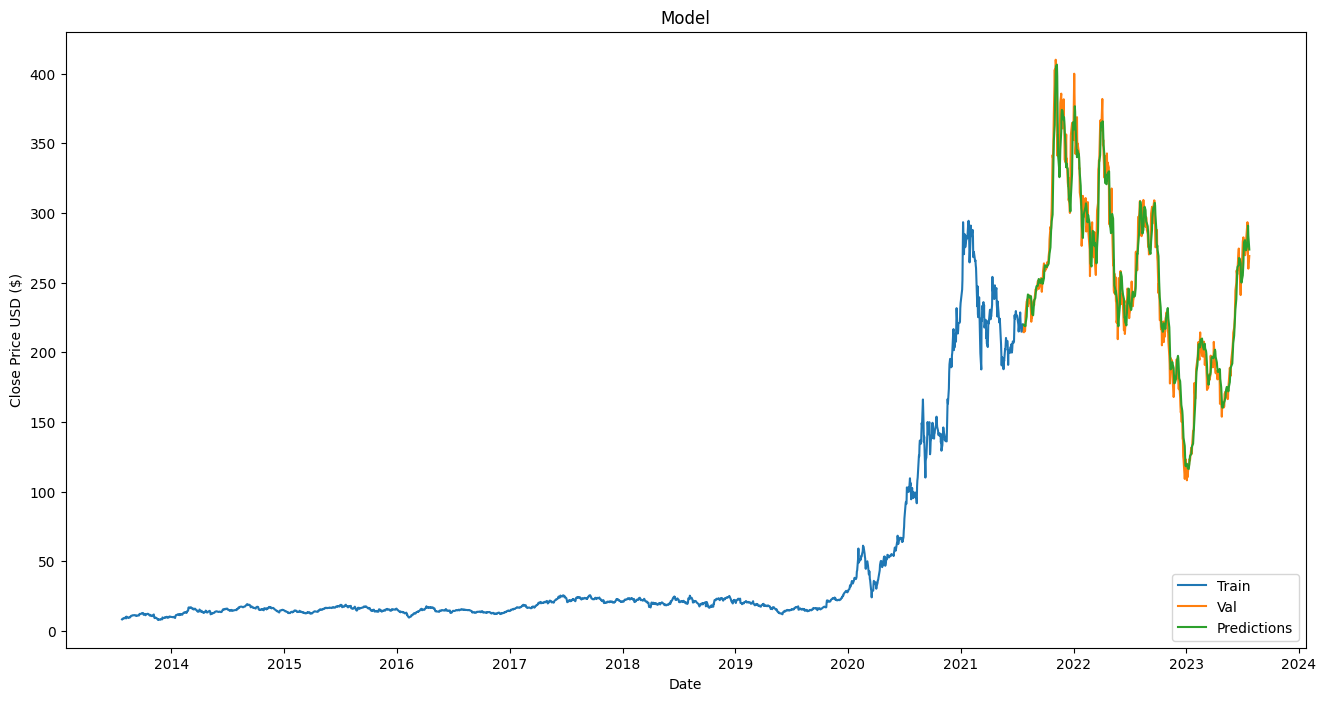

In [35]:
#Plotting
validation_new['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train_new)
plt.plot(validation_new[['Close/Last', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

We will zoom in the last values to better see the results

C:\Users\doitsinis\AppData\Local\Temp\ipykernel_26168\2409347827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_new['Predictions'] = predictions


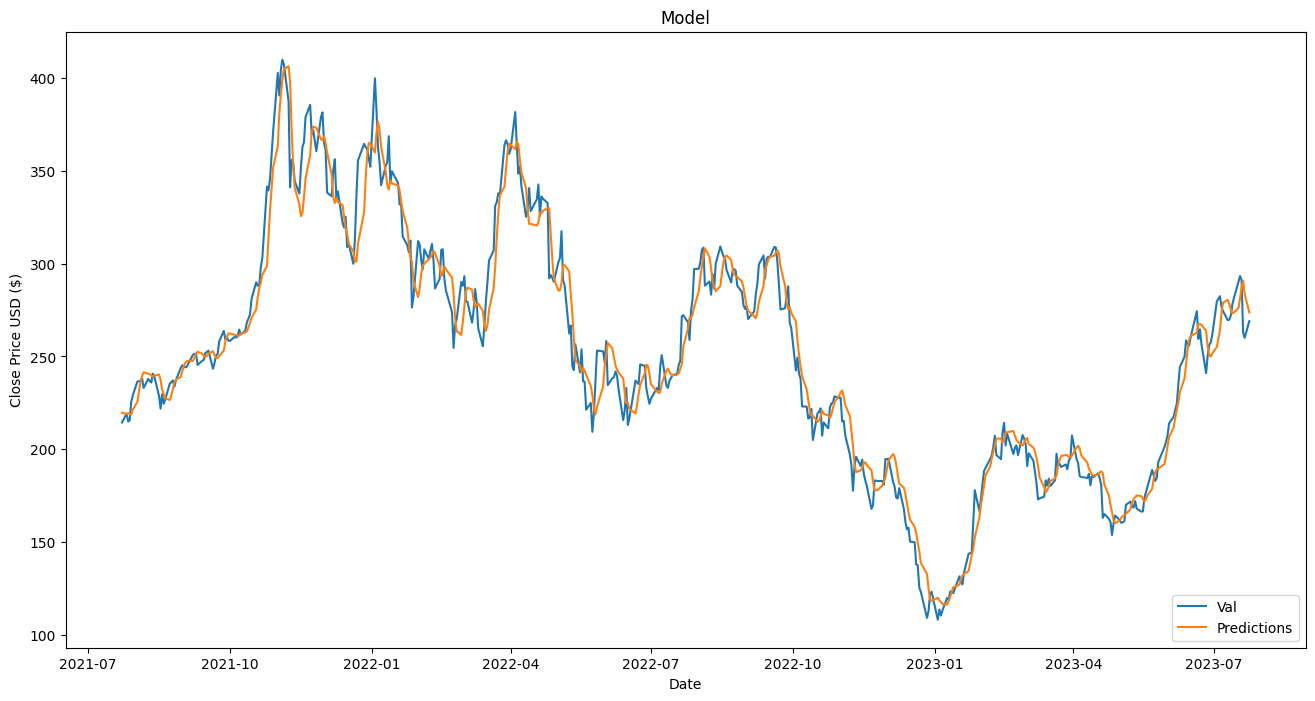

In [36]:
validation_new['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
#plt.plot(train_new)
plt.plot(validation_new[['Close/Last', 'Predictions']])
plt.legend([ 'Val', 'Predictions'], loc='lower right') #'Train',
plt.show()

From the above graphs we can take that our model got quite accurate in predicting the stock prices. 

The Orange line, i.e. our predictions, is at the most part almost ontop of the Validation line, so we can say that the model ss quite good. 

However, its not prerfect since there is some error as we showed above

